In [1]:
from moviepy.editor import AudioFileClip
import os
import tqdm
from collections import Counter
from decimal import *
import csv
import numpy as np

In [2]:
curr=os.getcwd()
audio_dir=curr+'/audio_data'# path to wav or mp3 audio files
audio_list=os.listdir(audio_dir)

In [14]:

frame_list=[]
time_list=[]
fps_list=[]
for i in tqdm.tqdm(audio_list):
    input_path=audio_dir+'/'+i
    audioclip = AudioFileClip(input_path)
    frame_list.append(audioclip.duration*audioclip.fps)
    fps_list.append(audioclip.fps)
    time_list.append(audioclip.duration)
    audioclip.close()


100%|██████████| 6427/6427 [04:44<00:00, 22.38it/s]


24.03
3.9699999999999998


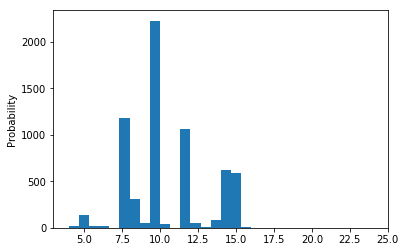

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(time_list, bins=30)
plt.ylabel('Probability');
print(max(time_list))
print(min(time_list))

# Fixed number of audio chunks
## Time stamp calculation
0 T

0     t<br>
t-overlap    t-overlap+t<br>
2*(t-overlap)    2*(t-overlap)+t<br>
.<br>
.<br>
.<br>
(time_stamps-1)*(t-overlap)     (time_stamps-1)*(t-overlap)+t<br>
............................<br>
(time_stamps-1)*(t-overlap)+t=min_length<br>

min_length=3960 ms<br>
overlap=50ms<br>
t=100ms<br>

we get time_stamps=76

## Final feature dimension for variable length audio file input
Each audio file is broken into 76 chunks with an overlap of 50ms.
Feature Dimension -[76,1582]








In [ ]:
open_dir=curr+'/open_chunks'#path to save features

In [3]:
time_stamp=Decimal(76)
over_lap=Decimal(50)
error_num=0
for i in tqdm.tqdm(audio_list):
    if(not os.path.isfile(open_dir+'/'+i[:-4]+'.npy')):
        
        #getting duration of audio file
        org_path=audio_dir+'/'+i
        audioclip = AudioFileClip(org_path)
        dur=Decimal(audioclip.duration*1000.0)
        audioclip.close()
        #each chunk duration
        sample_dur=Decimal(dur + over_lap*(time_stamp-1) )/time_stamp
        step=sample_dur-over_lap
        count=0
        ini=Decimal(0.0)
    
        # features appended in a list ini<=dur-sample_dur or 
        opensmile_array=[]
    
        while(count<76):
            start=float(ini/1000)
            end=float((ini+sample_dur)/1000)
            audioclip=AudioFileClip(org_path).subclip(start,end)
#         input_path=folder_path+'/'+str(count)+'.wav'
            input_path=open_dir+'/'+str(count)+'.wav'
            audioclip.write_audiofile(input_path,logger =None)
            audioclip.close()

        
            #opensmile features
            csv_output_path=open_dir+'/'+str(count)+'.csv'
            command="SMILExtract -C config/IS10_paraling.conf -I '"+input_path+"' -O '"+csv_output_path+"'"
            os.system(command)

        #creating npy file from csv file 
            
            with open(csv_output_path) as csvfile:
                csv_reader=csv.reader(csvfile,delimiter=',')
                cnt=1
                for row in csv_reader:
                    if cnt==1590:
                        feat=row[1:]
                        feat=feat[:-1]
                    cnt+=1
                np_array=np.zeros((1582))
                for k in range(1582):
                    np_array[k]=float(feat[k])
        
                if np.count_nonzero(np_array)<1000:
                    print("zeros values problem,",np.count_nonzero(np_array)," sample_dur",sample_dur)
                opensmile_array.append(np_array)
        
            os.remove(input_path)
            os.remove(csv_output_path)
            ini=ini+step
            count+=1
        np_file_name=i[:-4]+'.npy'
        if len(opensmile_array)!=time_stamp:
            print("time dimension ",len(opensmile_array))
            print("filename ",i[:-4])
        np.save(os.path.join(open_dir,np_file_name),np.array(opensmile_array))
        


    
    

100%|██████████| 6427/6427 [00:00<00:00, 268756.27it/s]


# Fixed chunk duration -> number of chunks is variable
## Final feature dimension for  variable length audio file input
Each audio file is divided into chunks of 75 ms with an overlap of 30ms.
Feature Dimension -[Variable,1582]

In [ ]:
open_dir=curr+'/open_chunks'#path to save features

In [6]:
chunk_len=Decimal(75)# in ms
over_lap=Decimal(30)# 40% of 75
error_num=0
min_time=10000
for i in tqdm.tqdm(audio_list):
    if(not os.path.isfile(open_dir+'/'+i[:-4]+'.npy')):
        print(i)
        #getting duration of audio file
        org_path=audio_dir+'/'+i
        audioclip = AudioFileClip(org_path)
        dur=Decimal(audioclip.duration*1000.0)
        audioclip.close()
        
        step=chunk_len-over_lap
        ini=Decimal(0.0)
        count=0
        # features appended in a list ini<=dur-sample_dur or 
        opensmile_array=[]
    
        while(ini<dur-chunk_len):
            start=float(ini/1000)
            end=float((ini+chunk_len)/1000)
            audioclip=AudioFileClip(org_path).subclip(start,end)
#         input_path=folder_path+'/'+str(count)+'.wav'
            input_path=open_dir+'/'+str(count)+'.wav'
            audioclip.write_audiofile(input_path,logger =None)
            audioclip.close()

        
            #opensmile features
            csv_output_path=open_dir+'/'+str(count)+'.csv'
            command="SMILExtract -C config/IS10_paraling.conf -I '"+input_path+"' -O '"+csv_output_path+"'"
            os.system(command)

        #creating npy file from csv file 
            
            with open(csv_output_path) as csvfile:
                csv_reader=csv.reader(csvfile,delimiter=',')
                cnt=1
                for row in csv_reader:
                    if cnt==1590:
                        feat=row[1:]
                        feat=feat[:-1]
                    cnt+=1
                np_array=np.zeros((1582))
                for k in range(1582):
                    np_array[k]=float(feat[k])
        
#                 if np.count_nonzero(np_array)<1000:
#                     print("zeros values problem,",np.count_nonzero(np_array)," sample_dur",sample_dur)
                opensmile_array.append(np_array)
        
            os.remove(input_path)
            os.remove(csv_output_path)
            ini=ini+step
            count+=1
        np_file_name=i[:-4]+'.npy'
        print("Total timestamps ")
        print(len(opensmile_array))
        np.save(os.path.join(open_dir,np_file_name),np.array(opensmile_array))
    else:
        arr=np.load(open_dir+'/'+i[:-4]+'.npy')
        if np.shape(arr)[0]<min_time:
            min_time= np.shape(arr)[0]
print("min time stamps is ",min_time)


    
    

100%|██████████| 6427/6427 [02:45<00:00, 38.79it/s]


AttributeError: 'str' object has no attribute 'min_time'

In [7]:
print("min time stamps is ",str(min_time))

min time stamps is  87
